In [1]:
import pandas as pd 
import numpy as np 
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")

In [10]:
data = data[["G1","G2","G3","studytime","failures","absences"]]

In [11]:
predict = "G3"

In [12]:
X = np.array(data.drop([predict], 1))
Y = np.array(data[predict])

In [54]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size = 0.1)

In [55]:
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.8722206496436967


In [56]:
print("Coefficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Coefficient: 
 [ 0.17144707  0.96808759 -0.16808823 -0.12491633  0.03674041]
Intercept: 
 -1.694658125577277


In [57]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

18.725717213461298 [19 18  2  0  2] 18
-1.0021521656536683 [6 0 2 0 0] 0
11.12588130114784 [ 8 12  1  0  0] 12
6.33779757463042 [8 7 2 0 6] 9
13.803557833770585 [13 14  3  0  6] 14
14.241059386714225 [15 14  2  0  4] 14
5.894472537689715 [7 7 2 1 2] 7
11.83953838295252 [11 12  2  0 10] 13
10.651008330722686 [11 11  2  0  4] 11
9.021617886897017 [ 8 10  2  0  0] 12
18.365055319538428 [18 18  4  0  6] 18
8.613508059536047 [9 9 1 0 6] 10
12.513702692602326 [11 13  2  0  2] 14
14.79277201616015 [13 15  2  0  2] 16
6.224217505425361 [7 7 1 0 3] 8
12.611668942888555 [12 13  2  0  0] 14
15.935665516591257 [15 16  3  0  2] 18
12.856596833911933 [13 13  2  0  2] 11
9.53595909886143 [11 10  2  0  0] 10
18.496403141356748 [18 18  3  0  5] 19
18.47743048378572 [17 18  1  0  0] 18
12.583824674318706 [10 13  1  0  4] 14
9.364512028206624 [10 10  2  0  0] 10
9.008756429948773 [11  9  2  0 12] 9
8.850170816242214 [ 7 10  2  0  0] 11
11.847803517269734 [14 11  1  0 18] 13
18.13789518112831 [16 18  2  0

In [58]:
import pickle

In [59]:
from matplotlib import style

In [62]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [64]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [65]:
best = 0
for _ in range(30):
	#now we'll split the above two arrays in 2, one for trainig and the other for testing the model
	x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size = 0.1)

	linear = linear_model.LinearRegression()

	linear.fit(x_train, y_train)
	acc = linear.score(x_test, y_test)
	print(acc)

	if acc > best: #we will write to the file if a better line accuracy is found
		#Saving the trained model to use for future data sets
		best = acc 
		with open("studentmodel.pickle", "wb") as f:
			pickle.dump(linear, f)

0.7766747561651348
0.7966057486041402
0.8313686859421047
0.8036715255601925
0.7604593824278587
0.8403076467933266
0.8688086449384029
0.7771443974653304
0.7451813311449175
0.8283049949940595
0.8303604945448324
0.8806756643714982
0.6821089185133089
0.8558602596801899
0.8239848971464003
0.8169286820471506
0.7887093324255483
0.8131274073218382
0.8984721276969335
0.7488835451040949
0.8958641047055774
0.8291290227676432
0.9228563693819594
0.8276907564654009
0.9423164603472803
0.8334707660619375
0.8150174234009607
0.8368547187524228
0.7605538125506908
0.849755713881248


In [66]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

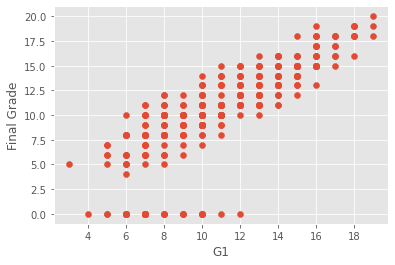

In [67]:
p = "G1"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()